In [1]:
n=3
Board=rand((1,0),(n,n))
B=Board
C=zeros(Int64,n+2,n+2)

for i in 1:n
    for j in 1:n
        C[i+1,j+1]=B[i,j]
    end
end

B=C

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  1  1  0  0
 0  1  0  1  0
 0  0  1  1  0
 0  0  0  0  0

In [2]:
A=zeros(Int64,(n+2,n+2))

for i in 2:n+1
    for j in 2:n+1
        A[i,j]=B[i+1,j]+B[i-1,j]+B[i,j+1]+B[i,j-1]+B[i+1,j+1]+B[i+1,j-1]+B[i-1,j+1]+B[i-1,j-1]
    end
end

A

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  2  3  2  0
 0  3  6  3  0
 0  2  3  2  0
 0  0  0  0  0

In [3]:
for i in 2:n+1
    for j in 2:n+1
        if A[i,j]>=4
            A[i,j]=0
        elseif A[i,j]<=1
            A[i,j]=0
        elseif A[i,j]==3
            A[i,j]=1
        elseif A[i,j]==2
            A[i,j]=B[i,j]
        end
    end
end

A

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  1  1  0  0
 0  1  0  1  0
 0  0  1  1  0
 0  0  0  0  0

In [60]:
function Conway(n)
    Board=zeros(Int64,(n+2,n+2))
    Board[2:n+1,2:n+1]=rand((1,0),(n,n))
    B=Board
    
    A=zeros(Int64,(n+2,n+2))

    for i in 2:n+1
        for j in 2:n+1
            A[i,j]=B[i+1,j]+B[i-1,j]+B[i,j+1]+B[i,j-1]+B[i+1,j+1]+B[i+1,j-1]+B[i-1,j+1]+B[i-1,j-1]
        end
    end
    
    for i in 2:n+1
        for j in 2:n+1
            if A[i,j]>=4
                A[i,j]=0
            elseif A[i,j]<=1
                A[i,j]=0
            elseif A[i,j]==3
                A[i,j]=1
            elseif A[i,j]==2
                A[i,j]=B[i,j]
            end
        end
    end
    
    B=A
end

Conway (generic function with 1 method)

In [130]:
D=Conway(6)

8×8 Matrix{Int64}:
 0  0  0  0  0  0  0  0
 0  0  1  1  1  0  0  0
 0  0  0  0  0  1  1  0
 0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0
 0  1  0  0  0  0  1  0
 0  0  0  1  0  1  1  0
 0  0  0  0  0  0  0  0

In [25]:
function Con(B)
    (n,n)=size(B)
    n=n-2
    
    A=zeros(Int64,(n+2,n+2))

    for i in 2:n+1
        for j in 2:n+1
            A[i,j]=B[i+1,j]+B[i-1,j]+B[i,j+1]+B[i,j-1]+B[i+1,j+1]+B[i+1,j-1]+B[i-1,j+1]+B[i-1,j-1]
        end
    end
    
    for i in 2:n+1
        for j in 2:n+1
            if A[i,j]>=4
                A[i,j]=0
            elseif A[i,j]<=1
                A[i,j]=0
            elseif A[i,j]==3
                A[i,j]=1
            elseif A[i,j]==2
                A[i,j]=B[i,j]
            end
        end
    end
    
    B=A
end

Con (generic function with 1 method)

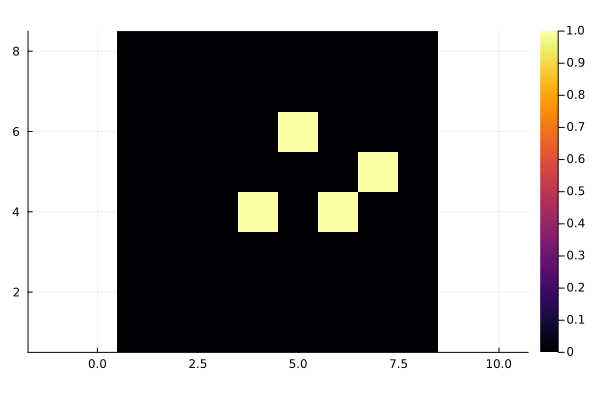

In [113]:
D=Con(D)
heatmap(D,aspect_ratio=:equal)

[ Info: Saved animation to C:\Users\boyto\tutorial_heatmap_anim.gif


Plots.AnimatedGif("C:\\Users\\boyto\\tutorial_heatmap_anim.gif")
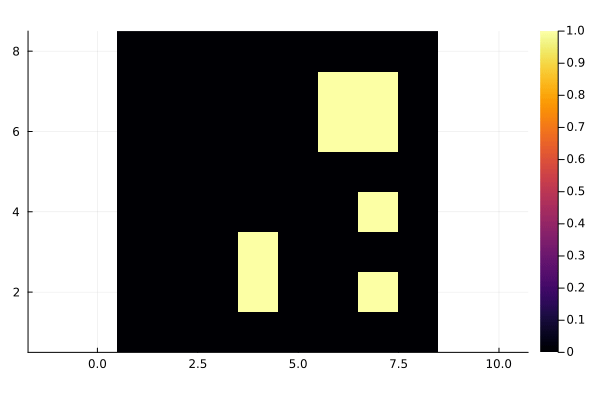

In [132]:
using Plots
D=Con(D)
anim = @animate for i = 1:100
    heatmap(D,aspect_ratio=:equal)
end

gif(anim, "tutorial_heatmap_anim.gif", fps = 10)

In [135]:
anim = Plots.Animation(::Any)
for i = 1:df:length(x)
    plot(heatmap(D,aspect_ratio=:equal), legend=false)
    Plots.frame(anim)
end
 
gif(anim, "tutorial_anim_fps30.gif", fps = 30)

LoadError: syntax: invalid "::" syntax around In[135]:1